#### 전이학습 
#### + 로스그리기 callbak 
#### + 예측 결과 그리기 
#### + 오버피팅 완화법

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv

--2021-12-27 00:16:58--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris_with_category_index.csv’

iris_with_category_ 100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-12-27 00:16:58 (43.0 MB/s) - ‘iris_with_category_index.csv’ saved [2218/2218]



In [ ]:
!ls -al
!head iris_with_category_index.csv

total 20
drwxr-xr-x 1 root root 4096 Dec 27 00:16 .
drwxr-xr-x 1 root root 4096 Dec 26 23:57 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 2218 Dec 27 00:16 iris_with_category_index.csv
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data
septal_length,septal_width,petal_length,petal_width,class
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


In [ ]:
iris = pd.read_csv("iris_with_category_index.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9307114e-01 6.6340780e-03 2.9475428e-04]
 [6.5059215e-03 9.9068791e-01 2.8061685e-03]
 [9.7737324e-01 2.2148108e-02 4.7863254e-04]
 [2.3563111e-03 9.9533576e-01 2.3079300e-03]
 [9.9563169e-01 4.0810984e-03 2.8722343e-04]
 [9.9543768e-01 4.3040160e-03 2.5836684e-04]
 [9.9624771e-01 3.4988611e-03 2.5344806e-04]
 [9.9650085e-01 3.2461369e-03 2.5298959e-04]
 [1.7731495e-02 9.7867167e-01 3.5968449e-03]
 [9.9255580e-01 7.1233511e-03 3.2086935e-04]
 [1.2607304e-03 2.7863771e-01 7.2010159e-01]
 [3.6183402e-03 9.9008876e-01 6.2928614e-03]
 [9.9033558e-01 9.3294177e-03 3.3493384e-04]
 [4.5209756e-04 3.9043475e-02 9.6050447e-01]
 [9.9654776e-01 3.1637149e-03 2.8853698e-04]
 [2.4750181e-03 9.3707353e-01 6.0451515e-02]
 [5.2221175e-03 9.9059969e-01 4.1782036e-03]
 [9.9327868e-01 6.4059859e-03 3.1536326e-04]
 [9.9271679e-01 6.9873664e-03 2.9581363e-04]
 [2.2951660e-03 9.9542576e-01 2.2790681e-03]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


# 로스 실시간 출력

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

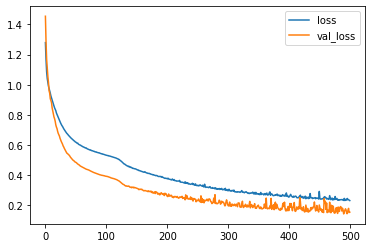

loss =  0.23126666247844696 , val_loss =  0.1543511152267456
1/1 [==============================] - 0s 18ms/step - loss: 0.0713 - accuracy: 1.0000
loss= 0.07130683213472366
acc= 1.0


In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
plot_losses = PlotLosses()
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses])

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)
              


In [ ]:
y_ = model.predict(test_x)
predicted = np.argmax( y_, axis = -1)

test_data_generator = ImageDataGenerator(...).flow_from_directory(...)



# 오버피팅 완화법

In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다

model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

# model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)
plot_losses = PlotLosses()
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses])

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

# CNN - MNIST ----> CNN - fashion_MNIST(분류) ----> 로스 그리기

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.fashion_mnist.load_data()

# 표준화
train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

4431872/4422102 [==============================] - 0s 0us/step


## 영상데이터 분류

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                         

## 로스 실시간 출력

In [ ]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback

class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

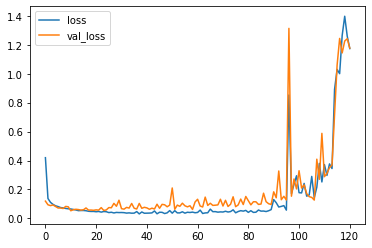

loss =  1.1738481521606445 , val_loss =  1.1769472360610962


In [ ]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(Conv2D(32, (3, 3)))   # ---> 성능 좋아지게 ADD
model.add(Conv2D(32, (3, 3)))   # ---> 성능 좋아지게 ADD
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Conv2D(64, (3, 3)))   # ---> 성능 좋아지게 ADD
model.add(Conv2D(64, (3, 3)))   # ---> 성능 좋아지게 ADD
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

plot_losses = PlotLosses()
model.fit(train_x, train_y, epochs=500, verbose=0, batch_size=20, validation_split=0.1, 
          callbacks=[plot_losses])
